https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
https://ww2.amstat.org/publications/jse/v19n3/decock/datadocumentation.txt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('C:\\Users\\Admin\\Desktop\\Data') #Personal
#os.chdir('C:\\Users\\Administrator\\Desktop\\Data')
from sklearn.feature_selection import VarianceThreshold

In [3]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None
hp=pd.read_csv('HousePricingDataset.csv')
hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


hp=hp1.iloc[:1000,:]
hp.head()
hp.shape

In [4]:
## Find out the columns which has missing values
[col for col in hp.columns if hp[col].isnull().sum()>0]

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

## Replacing the null values

In [5]:
## Since NaN represents there is no frotange to the property hence representing as 0
hp['LotFrontage'].fillna(value=0,inplace=True)
## Replacing the null values with 'No Alley Access'
hp['Alley'].fillna(value='No Alley Access',inplace=True)
## Replacing null values with None
hp['MasVnrType'].fillna(value='None',inplace=True)
## Replacing the null values of 'MasVnrArea'  with 0 as there is MasVnrType is none
hp['MasVnrArea'].fillna(value=0,inplace=True)
hp['BsmtQual'].fillna(value='No Basement',inplace=True)
hp['BsmtCond'].fillna(value='No Basement',inplace=True)
hp['BsmtExposure'].fillna(value='No Basement',inplace=True)
hp['BsmtFinType1'].fillna(value='No Basement',inplace=True)
hp['BsmtFinType2'].fillna(value='No Basement',inplace=True)
hp['GarageType'].fillna(value='No Garage',inplace=True)
hp['GarageYrBlt'].fillna(value='9999',inplace=True)
hp['GarageFinish'].fillna(value='No Garage',inplace=True)
hp['GarageQual'].fillna(value='No Garage',inplace=True)
hp['GarageCond'].fillna(value='No Garage',inplace=True)
hp['FireplaceQu'].fillna(value='No FirePlace',inplace=True)
hp['Electrical'].fillna(value='None',inplace=True)
hp['Fence'].fillna(value='No Fence',inplace=True)
hp['PoolQC'].fillna(value='No Pool',inplace=True)
hp['MiscFeature'].fillna(value='None',inplace=True)

## Function to Identify the unique value columns

In [6]:
#len(hp['customerID'])/(hp.shape[0])
def unique_columns(dataset):
    total_rows=dataset.shape[0]
    columns=dataset.columns
    unique_columns=[]
    for i in columns:
        if len(dataset[i].unique())==total_rows:
            unique_columns.append(i)
    return unique_columns

In [7]:
unique_columns=unique_columns(hp)
unique_columns

['Id']

In [8]:
hp.drop(unique_columns,axis=1,inplace=True)

## Type Conversions

In [9]:
hp['MSSubClass']=hp['MSSubClass'].astype('object')
hp['OverallQual']=hp['OverallQual'].astype('object')
hp['OverallCond']=hp['OverallCond'].astype('object')

## Numeric and Categorical Columns Columns

In [10]:
hp_numeric=hp.select_dtypes(include=['int64','float64'])
hp_numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


In [11]:
hp_categorical=hp.select_dtypes(include=['object'])
hp_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No FirePlace,Attchd,2003,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1,20,RL,Pave,No Alley Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
2,60,RL,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
3,70,RL,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
4,60,RL,Pave,No Alley Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal


## Constant Features

In [12]:
constant=VarianceThreshold(threshold=0)
constant.fit(hp_numeric)
constant.get_support()
non_constant_numeric=hp_numeric.columns[constant.get_support()]

In [13]:
Non_constant_categorical=[i for i in hp_categorical.columns if len(hp_categorical[i].unique())!=1]

In [14]:
hp_col=list(non_constant_numeric)+list(Non_constant_categorical)
hp=hp[hp_col]

In [15]:
hp.shape

(1460, 80)

## Quasi Constant Features

In [16]:
quasiconstant=VarianceThreshold(threshold=0.05)
quasiconstant.fit(hp_numeric)
quasiconstant.get_support()
non_quasi_constant_numeric=hp_numeric.columns[quasiconstant.get_support()]
print(non_quasi_constant_numeric)
#hp=hp[non_quasi_constant_numeric]

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [17]:
def quasi_constant_categorical(dataset):
    columns=dataset.columns
    cat_columns=[]
    for i in columns:
        #a=(dataset[i].value_counts()/np.float(len(dataset[i]))).sort_values(ascending=False)[:1]
        #index=(dataset[i].value_counts()/np.float(len(dataset[i]))).sort_values(ascending=False)[:1].index
        if list((hp_categorical[i].value_counts()/np.float(len(hp_categorical[i]))).sort_values(ascending=False)[:1])[0]<=0.95:
            cat_columns.append(i) 
    return cat_columns

In [18]:
non_quasi_constant_categorical=quasi_constant_categorical(hp_categorical)
final_non_quasi_constant=non_quasi_constant_categorical+list(non_quasi_constant_numeric)
hp=hp[final_non_quasi_constant]

In [19]:
hp.shape

(1460, 72)

In [20]:
#y=hp['SalePrice']
#hp.drop('SalePrice',axis=1, inplace=True)

## Correlation between the input variables

In [21]:
def correlation(dataset,threshold,Column):
    cor_mat=dataset.corr()
    cor_mat.drop(Column,axis=1,inplace=True)
    cor_mat.drop(Column,axis=0,inplace=True)
    correlated_variables=set()
    for i in range(len(cor_mat.columns)):
        for j in range(i):
            if abs(cor_mat.iloc[i,j])>threshold:
                colname=cor_mat.columns[i]
                correlated_variables.add(colname)
    return correlated_variables

In [22]:
correlated_variables=correlation(hp_numeric,0.65,'SalePrice')
correlated_variables

{'1stFlrSF', 'GarageArea', 'GrLivArea', 'TotRmsAbvGrd'}

In [23]:
hp.drop(labels=correlated_variables,axis=1,inplace=True)
hp_numeric.drop(labels=correlated_variables,axis=1,inplace=True)

## Second approach to identify the correlated features and groups

cor_mat=hp_numeric.corr()
cor_mat=cor_mat.abs().unstack()
cor_mat=cor_mat.sort_values(ascending=False)
cor_mat=cor_mat[cor_mat>=0.8]
cor_mat=cor_mat[cor_mat<1]
cor_mat=pd.DataFrame(cor_mat).reset_index()
cor_mat.columns=['Feature1','Feature2','correlation']
cor_mat

grouped_features_ls=[]
correlated_features=[]
for i in cor_mat['Feature1'].unique():
    if i not in grouped_features_ls:
        correlated_block=cor_mat[cor_mat['Feature1']==i]
        grouped_features_ls=grouped_features_ls+list(correlated_block['Feature2'].unique())+[i]
        correlated_features.append(correlated_block)

hp.drop(['GarageCars','TotRmsAbvGrd','TotalBsmtSF'],axis=1,inplace=True)

### Correlation between input features and output variable ('SalePrice')

In [24]:
def correlation(dataset,threshold,column):
    cor_mat=dataset.corr()
    correlated_variables=set()
    for i in cor_mat.columns:
        for j in [column]:
            if (i!=j) and (abs(cor_mat.loc[i,j])>threshold):
                correlated_variables.add(i)
    return correlated_variables

In [25]:
correlation(hp_numeric,0.65,'SalePrice')
#cor_mat.columns[0]

set()

In [26]:
hp_numeric.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Exploratory Data Analysis

In [27]:
percentile_col={}
for i in ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']:
    percentile_col[i]={}
    for j in range(0,100):
        per=np.percentile(hp[i],j)
        percentile_col[i][j]=per

In [28]:
percentile_col_df=pd.DataFrame(percentile_col)
percentile_col_df

,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageCars,HalfBath,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,MoSold,OpenPorchSF,PoolArea,SalePrice,ScreenPorch,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1300.00,0.00,0.0,0.00,0.0,1.00,0.00,0.0,34900.00,0.00,0.00,0.00,1872.00,1950.00,2006.0
1,0.00,0.0,1.0,0.00,0.00,0.0,0.00,0.00,0.0,1.0,0.0,0.0,1680.00,0.00,0.0,0.00,0.0,1.00,0.00,0.0,61815.97,0.00,0.00,0.00,1899.18,1950.00,2006.0
2,0.00,0.0,1.0,0.00,0.00,0.0,0.00,0.00,0.0,1.0,0.0,0.0,2124.74,0.00,0.0,0.00,0.0,1.00,0.00,0.0,79000.00,0.00,0.00,0.00,1908.36,1950.00,2006.0
3,0.00,0.0,1.0,0.00,0.00,0.0,0.00,0.00,0.0,1.0,0.0,0.0,2522.00,0.00,0.0,0.00,0.0,1.00,0.00,0.0,82000.00,0.00,312.33,0.00,1910.00,1950.00,2006.0
4,0.00,0.0,2.0,0.00,0.00,0.0,0.00,0.00,0.0,1.0,0.0,0.0,3095.04,0.00,0.0,0.00,0.0,2.00,0.00,0.0,85000.00,0.00,446.48,0.00,1914.36,1950.00,2006.0
5,0.00,0.0,2.0,0.00,0.00,0.0,0.00,0.00,0.0,1.0,0.0,0.0,3311.70,0.00,0.0,0.00,0.0,2.00,0.00,0.0,88000.00,0.00,519.30,0.00,1916.00,1950.00,2006.0
6,0.00,0.0,2.0,0.00,0.00,0.0,0.00,0.00,0.0,1.0,1.0,0.0,3862.52,0.00,0.0,0.00,0.0,2.00,0.00,0.0,91500.00,0.00,546.00,0.00,1919.54,1950.00,2006.0
7,0.00,0.0,2.0,0.00,0.00,0.0,0.00,0.00,0.0,1.0,1.0,0.0,4119.56,0.00,0.0,0.00,0.0,2.00,0.00,0.0,96565.00,0.00,576.00,0.00,1920.00,1950.00,2006.0
8,0.00,0.0,2.0,0.00,0.00,0.0,0.00,0.00,0.0,1.0,1.0,0.0,4426.00,0.00,0.0,0.00,0.0,3.00,0.00,0.0,100000.00,0.00,600.00,0.00,1920.00,1950.00,2006.0
9,0.00,0.0,2.0,0.00,0.00,0.0,36.62,0.00,0.0,1.0,1.0,0.0,4576.89,0.00,0.0,0.00,0.0,3.00,0.00,0.0,103724.00,0.00,624.00,0.00,1922.31,1950.00,2006.0


#Verifying the Lot Area

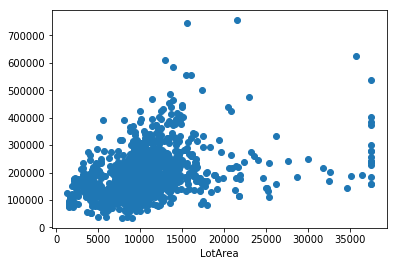

(array([ 54.,  77., 139., 541., 432., 139.,  33.,  20.,   3.,  22.]),
 array([ 36.05551275,  51.83233491,  67.60915708,  83.38597924,
         99.1628014 , 114.93962356, 130.71644572, 146.49326788,
        162.27009004, 178.0469122 , 193.82373436]),
 <a list of 10 Patch objects>)

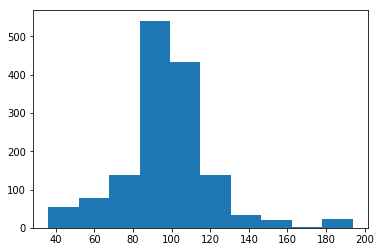

In [29]:
hp.loc[hp['LotArea']>37567.64,'LotArea']=37567.64
plt.scatter(hp['LotArea'],hp['SalePrice'])
plt.xlabel('LotArea')
plt.show()
plt.hist(np.sqrt(hp['LotArea']))

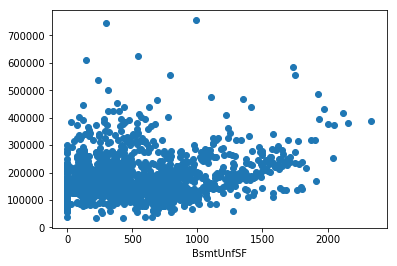

In [30]:
#hp.loc[hp['LotArea']>21571.80,'LotArea']=21571.80
plt.scatter(hp['BsmtUnfSF'],hp['SalePrice'])
plt.xlabel('BsmtUnfSF')
plt.show()


hp['BsmtUnfSF']=np.sqrt(hp['BsmtUnfSF'])

bins_lotfontage = [0,21,50, 75, 100, 313]
labels_lotfontage = [1,2,3,4,5]
hp['LotFrontage_binned'] = pd.cut(hp['LotFrontage'], bins=bins_lotfontage, labels=labels_lotfontage)

bins_MasVnrArea = [0,21,50, 75, 100, 313]
labels_MasVnrArea = [1,2,3,4,5]
hp['MasVnrArea_binned'] = pd.cut(hp['MasVnrArea'], bins=bins_MasVnrArea, labels=labels_MasVnrArea)

hp.loc[hp['MasVnrArea']>400,'MasVnrArea']=400

numeric_columns=['MasVnrArea','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','Age']
for i in numeric_columns:
    print('Column ',i)
    sns.boxplot(hp[i])
    plt.show()
    sns.distplot(hp[i])
    plt.show()
    plt.hist(hp[i])
    plt.show()

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import seaborn as sns

hp_categorical.columns

#plt.barplot(hp['MSSubClass'],hp['MSZoning'],width=0.5, color="blue")
sns.barplot(hp['MSSubClass'],hp['MSZoning'])

sns.FacetGrid(hp_categorical,hue='Street',size=3)\
    .map(sns.barplot,'MSSubClass','MSZoning')\
    .add_legend();
plt.show()

In [31]:
#for i in hp_categorical.columns:
#    sns.boxplot(hp[i],y)
#    plt.show()

In [32]:
## After Exploratory Data Analysis on the data based on boxplots
hp.drop(['LotShape','LotConfig','LandSlope','Functional'],axis=1,inplace=True)

In [33]:
hp.columns

Index(['MSSubClass', 'MSZoning', 'Alley', 'LandContour', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'SaleType', 'SaleCondition', 'LotFrontage', 'LotArea', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

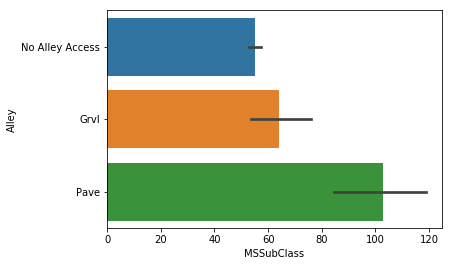

In [34]:
sns.barplot(hp['MSSubClass'],hp['Alley'])

In [35]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
ord_encoding=defaultdict(LabelEncoder)
ordinal_columns=['OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2','HeatingQC','Electrical','KitchenQual','FireplaceQu','GarageFinish','GarageQual', 'GarageCond', 'PavedDrive', 'Fence']
for i in ordinal_columns:
    encoded_df=pd.DataFrame()
    d=pd.DataFrame(ord_encoding[i].fit_transform(hp[i]))
    d.columns=[i]
    encoded_df=pd.concat([encoded_df,d],axis=1)
    hp.drop(i,axis=1, inplace=True)
    hp=pd.concat([hp,encoded_df],axis=1)
    

In [36]:
columns=['Exterior1st', 'Exterior2nd']
j=0
for i in range(len(hp['Exterior1st'])):
    if hp['Exterior1st'][i]!=hp['Exterior2nd'][i]:
        j+=1
print('total # of rows where the values in Exterior1st, Exterior2nd is ',j)
hp.drop('Exterior2nd',axis=1,inplace=True)

total # of rows where the values in Exterior1st, Exterior2nd is  215


In [40]:
columns=['MSSubClass','MSZoning','Neighborhood','HouseStyle','Condition1','SaleType','Foundation','Exterior1st']
Nominal_Class_dict={}
for i in columns:
    Percentages=(hp[i].value_counts()/hp[i].value_counts().sum())
    Nominal_Class_dict[i]={}
    for j in Percentages.index:
        Nominal_Class_dict[i][j]=Percentages[j]
   
    
Nominal_Class_dict

{'Condition1': {'Artery': 0.03287671232876712,
  'Feedr': 0.05547945205479452,
  'Norm': 0.863013698630137,
  'PosA': 0.005479452054794521,
  'PosN': 0.013013698630136987,
  'RRAe': 0.007534246575342466,
  'RRAn': 0.01780821917808219,
  'RRNe': 0.0013698630136986301,
  'RRNn': 0.003424657534246575},
 'Exterior1st': {'AsbShng': 0.0136986301369863,
  'AsphShn': 0.0006849315068493151,
  'BrkComm': 0.0013698630136986301,
  'BrkFace': 0.03424657534246575,
  'CBlock': 0.0006849315068493151,
  'CemntBd': 0.04178082191780822,
  'HdBoard': 0.15205479452054796,
  'ImStucc': 0.0006849315068493151,
  'MetalSd': 0.1506849315068493,
  'Plywood': 0.07397260273972603,
  'Stone': 0.0013698630136986301,
  'Stucco': 0.017123287671232876,
  'VinylSd': 0.3527397260273973,
  'Wd Sdng': 0.1410958904109589,
  'WdShing': 0.01780821917808219},
 'Foundation': {'BrkTil': 0.1,
  'CBlock': 0.43424657534246575,
  'PConc': 0.44315068493150683,
  'Slab': 0.01643835616438356,
  'Stone': 0.00410958904109589,
  'Wood': 0

In [41]:
for i in columns:
    for j in range(len(hp[i])):
        value_org=hp[i][j]
        if Nominal_Class_dict[i][value_org]>0.05:
            hp[i][j]=value_org
        else:
            hp[i][j]='New'
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [42]:
## This code is for a single columns
#MSSubClass_dict={}
#for i in MsSubClass_Percentages.index:
#        MSSubClass_dict[i]=MsSubClass_Percentages[i]

In [43]:
for i in columns:
    print(hp[i].unique())

[60 20 'New' 50 120]
['RL' 'RM' 'New']
['CollgCr' 'New' 'Somerst' 'OldTown' 'Sawyer' 'NridgHt' 'NAmes' 'Edwards'
 'Gilbert']
['2Story' '1Story' '1.5Fin' 'New']
['Norm' 'Feedr' 'New']
['WD' 'New']
['PConc' 'CBlock' 'BrkTil' 'New']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'New' 'Plywood']


In [44]:
hp['Remodelled']=hp['YearRemodAdd'] - hp['YearBuilt']

In [45]:
hp['Hand']=hp['YrSold']-hp['YearBuilt']

In [46]:
for i in range(len(hp['Hand'])):
    if hp['Hand'][i]==0:
        hp['Hand']='First'
    else:
        hp['Hand']='Second'

In [47]:
for i in range(len(hp['Remodelled'])):
    if  hp['Remodelled'][i]==0:
        hp['Remodelled'][i]='Old'
    else:
        hp['Remodelled'][i]='Remodelled'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [48]:
from sklearn.preprocessing import LabelBinarizer
from collections import defaultdict
import pandas as pd
encoding=defaultdict(LabelBinarizer)
columns_nominal=['Remodelled','Hand','Alley', 'LandContour','BldgType','RoofStyle', 'GarageType','MasVnrType','CentralAir','SaleCondition','MSZoning','Neighborhood','Exterior1st','HouseStyle','Condition1','SaleType','Foundation']
for i in columns_nominal:
    encoded_df=pd.DataFrame()
    d=pd.DataFrame(encoding[i].fit_transform(hp[i]))
    test_column=d.columns.values
    list1=[i+'_'+str(j) for j in test_column]
    d.columns=list1
    encoded_df=pd.concat([encoded_df,d],axis=1)
    hp.drop(i,axis=1, inplace=True)
    hp=pd.concat([hp,encoded_df],axis=1)

In [49]:
hp['Age']=2018-hp['YearBuilt']

In [50]:
hp.drop(['MSSubClass','YearBuilt','YearRemodAdd','YrSold'],axis=1,inplace=True)

In [51]:
#X_train.isnull().sum()
#hp.drop(['LotFrontage_binned','MasVnrArea_binned'],axis=1,inplace=True)

In [52]:
from sklearn.preprocessing import MinMaxScaler
#Minmax=MinMaxScaler(feature_range=(0, 1), copy=True)
from collections import defaultdict
encoding=defaultdict(MinMaxScaler)
columns_integer=['LotArea','BsmtUnfSF','LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','2ndFlrSF','WoodDeckSF','OpenPorchSF','Age']
for i in columns_integer:
    encoded_df=pd.DataFrame()
    d=pd.DataFrame(encoding[i].fit_transform(pd.DataFrame(hp[i])))
    
    #test_column=d.columns.values
    #list1=[i+'_'+str(j) for j in test_column]
    d.columns=[i]
    encoded_df=pd.concat([encoded_df,d],axis=1)
    hp.drop(i,axis=1, inplace=True)
    hp=pd.concat([hp,encoded_df],axis=1)


In [53]:
from sklearn.preprocessing import MinMaxScaler
#Minmax=MinMaxScaler(feature_range=(0, 1), copy=True)
from collections import defaultdict
encoding_saleprice=defaultdict(MinMaxScaler)
columns_integer=['SalePrice']
for i in columns_integer:
    encoded_df=pd.DataFrame()
    d=pd.DataFrame(encoding_saleprice[i].fit_transform(pd.DataFrame(hp[i])))
    
    #test_column=d.columns.values
    #list1=[i+'_'+str(j) for j in test_column]
    d.columns=[i]
    encoded_df=pd.concat([encoded_df,d],axis=1)
    hp.drop(i,axis=1, inplace=True)
    hp=pd.concat([hp,encoded_df],axis=1)


In [54]:
X_train_backup=hp.copy()

In [55]:
hp['SalePrice'].max()

1.0

In [56]:
y=hp['SalePrice']
hp.drop('SalePrice',axis=1,inplace=True)

In [57]:
hp.shape

(1460, 112)

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(hp,y,test_size=0.3,random_state=34)
#X_train=X_train.reset_index()
#X_test=X_test.reset_index()

In [59]:
X_train.head()

,GarageYrBlt,TotalBsmtSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,Remodelled_0,Hand_0,Alley_0,Alley_1,Alley_2,LandContour_0,LandContour_1,LandContour_2,LandContour_3,BldgType_0,BldgType_1,BldgType_2,BldgType_3,BldgType_4,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,RoofStyle_4,RoofStyle_5,GarageType_0,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5,GarageType_6,MasVnrType_0,MasVnrType_1,MasVnrType_2,MasVnrType_3,CentralAir_0,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5,MSZoning_0,MSZoning_1,MSZoning_2,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior1st_5,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,Condition1_0,Condition1_1,Condition1_2,SaleType_0,Foundation_0,Foundation_1,Foundation_2,Foundation_3,LotArea,BsmtUnfSF,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,2ndFlrSF,WoodDeckSF,OpenPorchSF,Age
512,1964,864,0,1,0,1,0,3,0,2,0,0,0,0,0,7,4,4,3,4,4,4,3,1,3,4,5,3,3,3,5,5,2,4,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0.215068,0.072346,0.223642,0.000,0.092310,0.118046,0.000000,0.000000,0.000000,0.376812
343,2005,1684,0,0,0,2,0,2,1,2,0,0,0,0,0,7,8,4,0,4,0,4,3,2,6,0,5,0,0,2,5,5,2,4,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0.208147,0.708904,0.201278,0.385,0.004961,0.000000,0.000000,0.577596,0.131627,0.036232
290,2006,1079,0,0,0,2,1,3,1,2,0,0,0,0,0,7,7,4,2,4,2,4,0,6,6,0,5,2,2,2,2,5,2,4,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0.394594,0.461901,0.383387,0.000,0.000000,0.000000,0.406780,0.000000,0.093236,0.028986
163,9999,882,0,0,0,1,0,1,0,0,0,0,0,0,0,4,3,5,3,4,4,4,3,6,6,0,5,3,3,1,3,3,2,2,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0.115806,0.377568,0.175719,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.391304
234,2002,860,0,1,0,2,1,4,2,2,0,0,0,0,0,5,5,4,2,4,2,4,3,2,6,0,5,2,5,0,5,5,2,4,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0.180629,0.100599,0.000000,0.000,0.110737,0.000000,0.532688,0.336056,0.087751,0.057971


In [60]:
#### Backward Feature Selection
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [71]:
sfs1 = SFS(RandomForestRegressor(n_jobs=4), 
           k_features=10, 
           forward=True, 
           floating=False,
           verbose=2,
           cv=3)
sfs1 = sfs1.fit(np.array(X_train.fillna(0)), y_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 112 out of 112 | elapsed:  1.3min finished

[2018-10-07 21:27:47] Features: 1/10 -- score: 0.6717721095266908[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 111 out of 111 | elapsed:  1.3min finished

[2018-10-07 21:29:06] Features: 2/10 -- score: 0.7317935762295208[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:  1.3min finished

[2018-10-07 21:30:25] Features: 3/10 -- score: 0.7734725838362825[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 109 out of 109 | elapsed:  1.3min finished

[2018-10-07 21:31:43] Features: 4/10 -- score: 0.7928716901059025[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  1.

In [72]:
selected_feat= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat

Index(['TotalBsmtSF', 'BsmtFullBath', 'FullBath', 'Fireplaces', 'GarageCars',
       'OverallQual', 'LandContour_3', 'Neighborhood_6', '2ndFlrSF',
       'WoodDeckSF'],
      dtype='object')

In [73]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [74]:
# evaluate performance of algorithm built
# using selected features

run_randomForests(X_train[selected_feat].fillna(0),
                  X_test[selected_feat].fillna(0),
                  y_train, y_test)

Train set


AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

## RBF

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
reg_svm=SVR()
parameters={'C':[0.00001,0.0001,0.001, 0.01, 0.1, 1, 10],'gamma':[0.00001,0.0001,0.001, 0.01, 0.1, 1]}
gcv_svr=GridSearchCV(reg_svm,parameters,scoring='neg_mean_squared_error',cv=5)
gcv_svr.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10], 'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [229]:
# SVR
from sklearn.svm import SVR
reg_svm=SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)
reg_svm.fit(X_train,y_train)
y_pred_test=reg_svm.predict(X_test)
y_pred_train=reg_svm.predict(X_train)
from sklearn.metrics import r2_score
print('\nr2 square test',r2_score(y_test,y_pred_test))
print('r2 square train',r2_score(y_train,y_pred_train))

print('\nTrain Results')
output_train=pd.DataFrame({'actual_train':y_train,'predicted_train':y_pred_train})
output_train['actual_train']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_train['actual_train']))
output_train['predicted_train']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_train['predicted_train']))
output_train['errors']=output_train['actual_train']-output_train['predicted_train']
print(output_train.head())

print('\nTest Results')
output_test=pd.DataFrame()
output_test=pd.DataFrame({'actual_test':y_test,'predicted_test':y_pred_test})
output_test['actual_test']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_test['actual_test']))
output_test['predicted_test']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_test['predicted_test']))
output_test['errors']=output_test['actual_test']-output_test['predicted_test']
print(output_test.head())

[LibSVM]
r2 square test 0.40056825928551154
r2 square train 0.43314242019686267

Train Results
     actual_train  predicted_train        errors
512      129900.0    169158.794081 -39258.794081
343      266000.0    256492.889365   9507.110635
290      233230.0    195905.941724  37324.058276
163      103200.0    170733.060323 -67533.060323
234      216500.0    169654.989841  46845.010159

Test Results
      actual_test  predicted_test        errors
1399     137450.0   181005.496325 -43555.496325
578      146000.0   146830.133761   -830.133761
318      260000.0   241516.773437  18483.226563
1340     123000.0   168447.608650 -45447.608650
654      350000.0   328966.793849  21033.206151


## linear

from sklearn.model_selection import GridSearchCV
reg_svm=SVR()
parameters={'C':[0.00001,0.0001,0.001, 0.01, 0.1, 1, 10],'gamma':[0.00001,0.0001,0.001, 0.01, 0.1, 1],'kernel':['linear','rbf']}
gcv_svr=GridSearchCV(reg_svm,parameters,scoring='neg_mean_squared_error',cv=5)
gcv_svr.fit(X_train,y_train)

In [228]:
# SVR
from sklearn.svm import SVR
reg_svm=SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)
reg_svm.fit(X_train,y_train)

y_pred_test=reg_svm.predict(X_test)
y_pred_train=reg_svm.predict(X_train)

from sklearn.metrics import r2_score
print('\nr2 square test',r2_score(y_test,y_pred_test))
print('r2 square train',r2_score(y_train,y_pred_train))

## Calculating Rsquare
SS_Residual = sum((y_test-y_pred_test)**2)
SS_total=sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_total

#Adjusted R-Square
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Rsqauare',r_squared)
print('Adjusted Rsquare',adjusted_r_squared)



print('\nTrain Results')
output_train=pd.DataFrame({'actual_train':y_train,'predicted_train':y_pred_train})
output_train['actual_train']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_train['actual_train']))
output_train['predicted_train']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_train['predicted_train']))
output_train['errors']=output_train['actual_train']-output_train['predicted_train']
print(output_train.head())
print('Mean Error of train',output_train['errors'].mean())
print('Median Error of train',output_train['errors'].median())

print('\nTest Results')
output_test=pd.DataFrame()
output_test=pd.DataFrame({'actual_test':y_test,'predicted_test':y_pred_test})
output_test['actual_test']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_test['actual_test']))
output_test['predicted_test']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_test['predicted_test']))
output_test['errors']=output_test['actual_test']-output_test['predicted_test']
print(output_test.head())
print('Mean Error of test',output_test['errors'].mean())
print('Median Error of test',output_test['errors'].median())

[LibSVM]
r2 square test 0.40056825928551154
r2 square train 0.43314242019686267
Rsqauare 0.8048548265386862
Adjusted Rsquare 0.7384096907895885

Train Results
     actual_train  predicted_train        errors
512      129900.0    169158.794081 -39258.794081
343      266000.0    256492.889365   9507.110635
290      233230.0    195905.941724  37324.058276
163      103200.0    170733.060323 -67533.060323
234      216500.0    169654.989841  46845.010159
Mean Error of train -11492.730072937495
Median Error of train -25573.245907004137

Test Results
      actual_test  predicted_test        errors
1399     137450.0   181005.496325 -43555.496325
578      146000.0   146830.133761   -830.133761
318      260000.0   241516.773437  18483.226563
1340     123000.0   168447.608650 -45447.608650
654      350000.0   328966.793849  21033.206151
Mean Error of test -11652.591697909325
Median Error of test -25218.54343944021


## Decision Tress

In [145]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor(max_depth=5,min_samples_split=5,min_samples_leaf=3)
DTR.fit(X_train,y_train)
DTR.feature_importances_
DTR.fit(X_train,y_train)
y_pred_test=DTR.predict(X_test)
y_pred_train=DTR.predict(X_train)

from sklearn.metrics import r2_score
print('\nr2 square test',r2_score(y_test,y_pred_test))
print('r2 square train',r2_score(y_train,y_pred_train))

## Calculating Rsquare
SS_Residual = sum((y_test-y_pred_test)**2)
SS_total=sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_total

#Adjusted R-Square
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Rsqauare',r_squared)
print('Adjusted Rsquare',adjusted_r_squared)



print('\nTrain Results')
output_train=pd.DataFrame({'actual_train':y_train,'predicted_train':y_pred_train})
output_train['actual_train']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_train['actual_train']))
output_train['predicted_train']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_train['predicted_train']))
output_train['errors']=output_train['actual_train']-output_train['predicted_train']
print(output_train.head())
print('Mean Error of train',output_train['errors'].mean())
print('Median Error of train',output_train['errors'].median())

print('\nTest Results')
output_test=pd.DataFrame()
output_test=pd.DataFrame({'actual_test':y_test,'predicted_test':y_pred_test})
output_test['actual_test']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_test['actual_test']))
output_test['predicted_test']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_test['predicted_test']))
output_test['errors']=output_test['actual_test']-output_test['predicted_test']
print(output_test.head())
print('Mean Error of test',output_test['errors'].mean())
print('Median Error of test',output_test['errors'].median())


r2 square test 0.6761194444358444
r2 square train 0.8407968463975443
Rsqauare 0.8945605931361281
Adjusted Rsquare 0.8582245513861169

Train Results
     actual_train  predicted_train        errors
512      129900.0    120230.516556   9669.483444
343      266000.0    329936.958333 -63936.958333
290      233230.0    224688.100000   8541.900000
163      103200.0    103598.576923   -398.576923
234      216500.0    226227.173913  -9727.173913
Mean Error of train -3.6023821455741813e-12
Median Error of train -730.5165562913899

Test Results
      actual_test  predicted_test        errors
1399     137450.0   185003.996016 -47553.996016
578      146000.0   185003.996016 -39003.996016
318      260000.0   277433.333333 -17433.333333
1340     123000.0   103598.576923  19401.423077
654      350000.0   285660.326923  64339.673077
Mean Error of train 1877.068644934488
Median Error of train -1020.4771746347833


In [90]:
a=np.argsort(DTR.feature_importances_)[:20]
#DTR.tree_ 
X_train.columns[a]

Index(['index', 'Neighborhood_1', 'Neighborhood_0', 'MSZoning_2', 'MSZoning_0',
       'SaleCondition_5', 'SaleCondition_4', 'SaleCondition_3',
       'SaleCondition_2', 'SaleCondition_1', 'SaleCondition_0',
       'Neighborhood_2', 'MasVnrType_3', 'MasVnrType_1', 'MasVnrType_0',
       'GarageType_6', 'GarageType_5', 'GarageType_4', 'GarageType_3',
       'GarageType_2'],
      dtype='object')

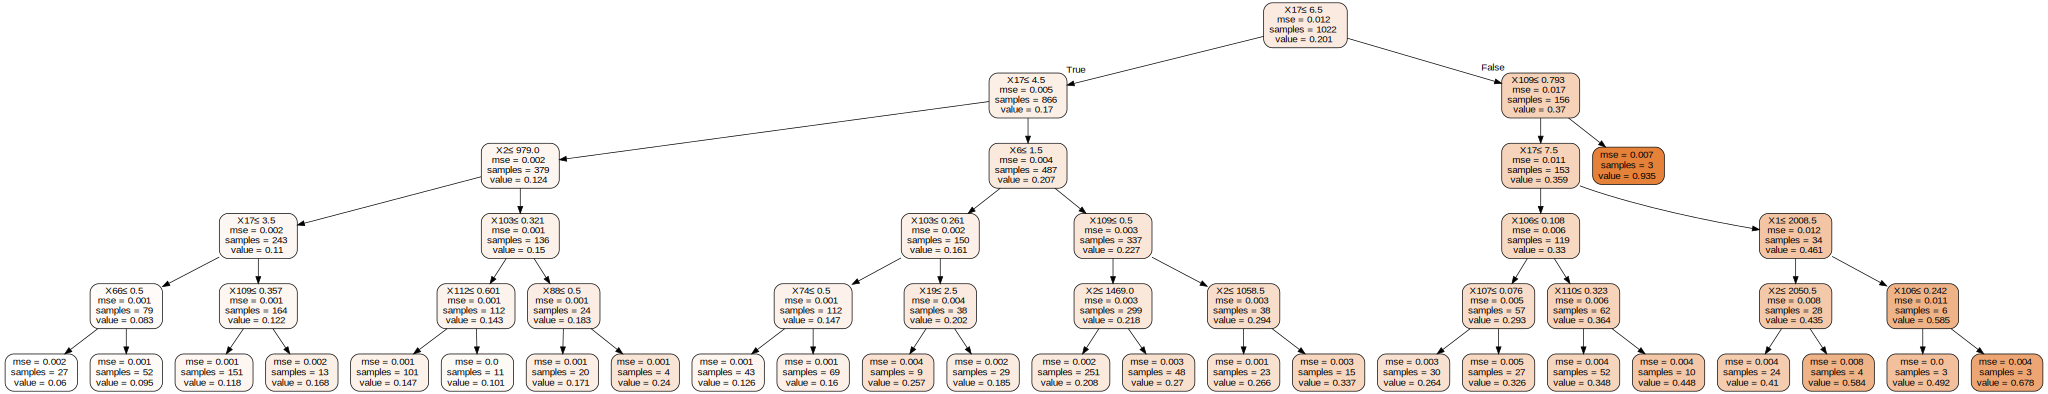

In [81]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(DTR, out_file=None,
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data) 
graph

## Random Forest

In [69]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(oob_score=True,n_estimators=1000,min_samples_leaf=25,max_features=0.8)
RFR.fit(X_train,y_train)
RFR.feature_importances_
RFR.fit(X_train,y_train)
y_pred_test=RFR.predict(X_test)
y_pred_train=RFR.predict(X_train)

from sklearn.metrics import r2_score
print('\nr2 square test',r2_score(y_test,y_pred_test))
print('r2 square train',r2_score(y_train,y_pred_train))

## Calculating Rsquare
SS_Residual = sum((y_test-y_pred_test)**2)
SS_total=sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_total

#Adjusted R-Square
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Rsqauare',r_squared)
print('Adjusted Rsquare',adjusted_r_squared)



print('\nTrain Results')
output_train=pd.DataFrame({'actual_train':y_train,'predicted_train':y_pred_train})
output_train['actual_train']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_train['actual_train']))
output_train['predicted_train']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_train['predicted_train']))
output_train['errors']=output_train['actual_train']-output_train['predicted_train']
print(output_train.head())
print('Mean Error of train',output_train['errors'].mean())
print('Median Error of train',output_train['errors'].median())

print('\nTest Results')
output_test=pd.DataFrame()
output_test=pd.DataFrame({'actual_test':y_test,'predicted_test':y_pred_test})
output_test['actual_test']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_test['actual_test']))
output_test['predicted_test']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_test['predicted_test']))
output_test['errors']=output_test['actual_test']-output_test['predicted_test']
print(output_test.head())
print('Mean Error of test',output_test['errors'].mean())
print('Median Error of test',output_test['errors'].median())


r2 square test 0.7899972010128524
r2 square train 0.8137892696177171
Rsqauare 0.9316335291373439
Adjusted Rsquare 0.9080733914862131

Train Results
     actual_train  predicted_train        errors
512      129900.0    128070.954954   1829.045046
343      266000.0    292943.252397 -26943.252397
290      233230.0    245706.562902 -12476.562902
163      103200.0    105976.453327  -2776.453327
234      216500.0    200992.308006  15507.691994
Mean Error of train 4.381688312236509
Median Error of train -2204.307589958051

Test Results
      actual_test  predicted_test        errors
1399     137450.0   151276.229947 -13826.229947
578      146000.0   173978.176821 -27978.176821
318      260000.0   246285.049786  13714.950214
1340     123000.0   124960.595217  -1960.595217
654      350000.0   341212.729190   8787.270810
Mean Error of test 1888.8379853516828
Median Error of test -2202.305492846688


In [58]:
RFR.feature_importances_

array([4.98087502e-03, 4.83425204e-03, 5.21821036e-02, 2.63326404e-05,
       8.66531438e-04, 1.60100320e-04, 3.76740352e-02, 4.27838677e-04,
       1.32429443e-03, 7.40147011e-03, 4.31098566e-02, 7.82503888e-04,
       6.36249416e-04, 1.78111571e-03, 3.70205613e-05, 8.91471537e-06,
       5.76891987e-03, 5.75291255e-01, 3.70804480e-03, 9.65918506e-04,
       9.72630013e-04, 2.89159491e-03, 6.79151516e-04, 1.76710135e-03,
       7.96431692e-04, 7.56838962e-04, 1.36408943e-03, 7.48203757e-04,
       1.10762331e-02, 1.13223070e-03, 1.15219487e-03, 9.78950403e-04,
       1.32891044e-04, 5.29861646e-04, 4.53216308e-04, 1.49086635e-03,
       0.00000000e+00, 1.19461035e-04, 1.66775016e-03, 3.02542861e-04,
       2.73135773e-05, 3.30402583e-04, 3.50136813e-04, 4.45862679e-04,
       1.37248862e-03, 9.12975048e-06, 4.74765682e-05, 3.47620049e-05,
       1.06736016e-04, 1.63928986e-06, 4.03213122e-04, 2.43272665e-06,
       1.10983756e-04, 7.69370367e-06, 1.15147429e-08, 0.00000000e+00,
      

In [94]:
len(RFR.oob_prediction_)

1022

## Gradient Boosting

In [161]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor(max_features=0.5,min_samples_split=30,n_estimators=9,min_samples_leaf=20,learning_rate=0.1,max_depth=8)
GBR.fit(X_train,y_train)
GBR.feature_importances_
GBR.fit(X_train,y_train)
y_pred_test=GBR.predict(X_test)
y_pred_train=GBR.predict(X_train)
from sklearn.metrics import r2_score
print('\nr2 square test',r2_score(y_test,y_pred_test))
print('r2 square train',r2_score(y_train,y_pred_train))

## Calculating Rsquare
SS_Residual = sum((y_test-y_pred_test)**2)
SS_total=sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_total

#Adjusted R-Square
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Rsqauare',r_squared)
print('Adjusted Rsquare',adjusted_r_squared)

print('\nTrain Results')
output_train=pd.DataFrame({'actual_train':y_train,'predicted_train':y_pred_train})
output_train['actual_train']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_train['actual_train']))
output_train['predicted_train']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_train['predicted_train']))
output_train['errors']=output_train['actual_train']-output_train['predicted_train']
print(output_train.head())
print('Mean Error of train',output_train['errors'].mean())
print('Median Error of train',output_train['errors'].median())

print('\nTest Results')
output_test=pd.DataFrame()
output_test=pd.DataFrame({'actual_test':y_test,'predicted_test':y_pred_test})
output_test['actual_test']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_test['actual_test']))
output_test['predicted_test']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_test['predicted_test']))
output_test['errors']=output_test['actual_test']-output_test['predicted_test']
print(output_test.head())
print('Mean Error of test',output_test['errors'].mean())
print('Median Error of test',output_test['errors'].median())

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000000000F3DD5C0>>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 482, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'



r2 square test 0.6760238569424899
r2 square train 0.7191572669145794
Rsqauare 0.8945294746005146
Adjusted Rsquare 0.8581827089243842

Train Results
     actual_train  predicted_train        errors
512      129900.0    149292.476962 -19392.476962
343      266000.0    249065.279430  16934.720570
290      233230.0    212383.260573  20846.739427
163      103200.0    136768.699791 -33568.699791
234      216500.0    195449.466777  21050.533223
Mean Error of train 1.0550850473796319e-11
Median Error of train -7182.392169072045

Test Results
      actual_test  predicted_test        errors
1399     137450.0   154626.222820 -17176.222820
578      146000.0   171025.402671 -25025.402671
318      260000.0   225405.749824  34594.250176
1340     123000.0   144868.531494 -21868.531494
654      350000.0   295691.723190  54308.276810
Mean Error of test 2099.6971636503613
Median Error of test -5819.18500410112


In [104]:
GBR.train_score_[99]

0.00037849596239864804

In [154]:
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':range(20,81,10)}
GRS_GBR=GridSearchCV(GBR,param_test1,scoring='mean_squared_error')
GRS_GBR.fit(X_train,y_train)
GRS_GBR.grid_scores_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\sit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\sit

[mean: -0.00230, std: 0.00040, params: {'n_estimators': 20},
 mean: -0.00188, std: 0.00026, params: {'n_estimators': 30},
 mean: -0.00175, std: 0.00021, params: {'n_estimators': 40},
 mean: -0.00172, std: 0.00017, params: {'n_estimators': 50},
 mean: -0.00162, std: 0.00007, params: {'n_estimators': 60},
 mean: -0.00162, std: 0.00017, params: {'n_estimators': 70},
 mean: -0.00163, std: 0.00013, params: {'n_estimators': 80}]

### XGBoosting

In [183]:
#X_train.drop('GarageYrBlt',axis=1, inplace=True)
X_test.drop('GarageYrBlt',axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [184]:
import xgboost as xgb
XGBR=xgb.XGBRegressor(reg_alpha=1,reg_lambda=0)
XGBR.fit(X_train,y_train)
#GBR.feature_importances_
GBR.fit(X_train,y_train)
y_pred_test=GBR.predict(X_test)
y_pred_train=GBR.predict(X_train)
from sklearn.metrics import r2_score
print('\nr2 square test',r2_score(y_test,y_pred_test))
print('r2 square train',r2_score(y_train,y_pred_train))

## Calculating Rsquare
SS_Residual = sum((y_test-y_pred_test)**2)
SS_total=sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_total

#Adjusted R-Square
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Rsqauare',r_squared)
print('Adjusted Rsquare',adjusted_r_squared)

print('\nTrain Results')
output_train=pd.DataFrame({'actual_train':y_train,'predicted_train':y_pred_train})
output_train['actual_train']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_train['actual_train']))
output_train['predicted_train']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_train['predicted_train']))
output_train['errors']=output_train['actual_train']-output_train['predicted_train']
print(output_train.head())
print('Mean Error of train',output_train['errors'].mean())
print('Median Error of train',output_train['errors'].median())

print('\nTest Results')
output_test=pd.DataFrame()
output_test=pd.DataFrame({'actual_test':y_test,'predicted_test':y_pred_test})
output_test['actual_test']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_test['actual_test']))
output_test['predicted_test']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_test['predicted_test']))
output_test['errors']=output_test['actual_test']-output_test['predicted_test']
print(output_test.head())
print('Mean Error of test',output_test['errors'].mean())
print('Median Error of test',output_test['errors'].median())


r2 square test 0.6869321059246197
r2 square train 0.7167913685252759
Rsqauare 0.898080658155192
Adjusted Rsquare 0.8633780601650887

Train Results
     actual_train  predicted_train        errors
512      129900.0    151720.194252 -21820.194252
343      266000.0    241036.978411  24963.021589
290      233230.0    215033.405389  18196.594611
163      103200.0    130611.115517 -27411.115517
234      216500.0    202991.901047  13508.098953
Mean Error of train 1.1547556996287198e-11
Median Error of train -7369.559133508708

Test Results
      actual_test  predicted_test        errors
1399     137450.0   161057.998417 -23607.998417
578      146000.0   172412.349451 -26412.349451
318      260000.0   227099.824206  32900.175794
1340     123000.0   151061.926402 -28061.926402
654      350000.0   307382.924896  42617.075104
Mean Error of test 2045.0929987136367
Median Error of test -6400.975767676355


In [180]:
XGBR.feature_importances_

array([0.11622276, 0.        , 0.01452785, 0.        , 0.01937046,
       0.01937046, 0.        , 0.031477  , 0.00968523, 0.        ,
       0.        , 0.00242131, 0.        , 0.        , 0.01452785,
       0.06053269, 0.10653753, 0.        , 0.        , 0.00242131,
       0.        , 0.01937046, 0.00484262, 0.        , 0.01452785,
       0.        , 0.02179177, 0.        , 0.        , 0.        ,
       0.        , 0.00242131, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02663438, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00726392,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00242131, 0.00484262,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02905569, 0.        , 0.01452785, 0.01694915, 0.     

In [185]:
pd.options.display.max_rows=None

In [191]:
XGBR.

<bound method RegressorMixin.score of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=1, reg_lambda=0, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)>

In [200]:
from mlxtend.regressor import StackingRegressor
from sklearn import model_selection
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression

In [201]:

reg_svm=SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

DTR=DecisionTreeRegressor(max_depth=5,min_samples_split=5,min_samples_leaf=3)

RFR=RandomForestRegressor(oob_score=True,n_estimators=1000,min_samples_leaf=25,max_features=0.8)


GBR=GradientBoostingRegressor(max_features=0.5,min_samples_split=30,n_estimators=9,min_samples_leaf=20,learning_rate=0.1,max_depth=8)


XGBR=xgb.XGBRegressor(reg_alpha=1,reg_lambda=0)

lr=LinearRegression()

In [236]:
srgr=StackingRegressor(regressors=[reg_svm,DTR,RFR,GBR,XGBR],meta_regressor=lr)

In [244]:
for clf,label in zip([reg_svm,DTR,RFR,GBR,XGBR,srgr],['reg_svm','DTR','RFR','GBR','XGBR','regressor']):
    scores=model_selection.cross_val_score(clf,X_train,y_train,cv=5,scoring='r2')
    print('Accuracy:%0.2f (+/- %0.2f) [%s]'% (scores.mean(),scores.std(),label))

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Accuracy:0.37 (+/- 0.05) [reg_svm]
Accuracy:0.70 (+/- 0.04) [DTR]
Accuracy:0.76 (+/- 0.03) [RFR]
Accuracy:0.66 (+/- 0.02) [GBR]
Accuracy:0.85 (+/- 0.03) [XGBR]
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Accuracy:0.84 (+/- 0.03) [regressor]


In [240]:
clf1=SVR()
clf2=DecisionTreeRegressor()
clf3=RandomForestRegressor()
clf4=GradientBoostingRegressor()
clf5=xgb.XGBRegressor()
clf6=LinearRegression()
srgr_basic=StackingRegressor(regressors=[clf1,clf2,clf3,clf4,clf5],meta_regressor=clf6)
for clf,label in zip([clf1,clf2,clf3,clf4,clf5,srgr],['reg_svm','DTR','RFR','GBR','XGBR','regressor']):
    scores=model_selection.cross_val_score(clf,X_train,y_train,cv=3)
    print('Accuracy:%0.2f (+/- %0.2f) [%s]'% (scores.mean(),scores.std(),label))

Accuracy:0.01 (+/- 0.02) [reg_svm]
Accuracy:0.67 (+/- 0.07) [DTR]
Accuracy:0.85 (+/- 0.01) [RFR]
Accuracy:0.88 (+/- 0.01) [GBR]
Accuracy:0.88 (+/- 0.01) [XGBR]
[LibSVM][LibSVM][LibSVM]Accuracy:0.83 (+/- 0.02) [regressor]


In [231]:
model_selection.cross_val_score(clf1,X_train,y_train, cv=3)

array([ 0.04636788, -0.00927158, -0.00163436])

In [203]:
srgr=StackingRegressor(regressors=[reg_svm,DTR,RFR,GBR,XGBR],meta_regressor=lr)

In [1]:
srgr_basic.fit(X_train,y_train)
srgr_basic.predict(X_test)

NameError: name 'srgr_basic' is not defined